In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/ML_ASSIGNMENT_2_1

/content/gdrive/My Drive/ML_ASSIGNMENT_2_1


In [0]:
ls

 a1_d3.txt
 bank_forged_note_1.csv
 bank_forged_note.csv
 bank_forged_note.gsheet
 data1.txt
 data2.txt
 data3.txt
 data4.txt
 data5.txt
 data_banknote_authentication.txt
 housepricedata.csv
'Logistic regression_final_with.ipynb'
'Logistic regression_final_without.ipynb'
 ML_2_1.ipynb
 ML_222
 ML_2_2.ipynb
'Naive Bayes.ipynb'
 Naive_bayes_sa.ipynb
 neural_net.ipynb
 neural_networks_assignment1_finall.ipynb
 neural_networks_assignment.ipynb
 stopword.txt
 test1.txt
 test2.txt
 test3.txt
 test4.txt
 test5.txt
 Untitled0.ipynb


In [0]:
def initialise(nn_architecture, seed = 99):
  np.random.seed(seed)
  parameters = {}
  for index,layer in enumerate(nn_architecture):
    input_size=layer["input_dim"]
    output_size=layer["output_dim"]
    parameters['W'+str(index+1)]=np.random.randn(output_size,input_size)*0.1
    parameters['b'+str(index+1)]=np.random.randn(output_size,1)*0.1
  return parameters

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

In [0]:
import pandas as pd

In [0]:
def sigmoid(Z):
  A=1/(1+np.exp(-Z))
  np.clip(A,0,1,A)
  return A

In [0]:
def relu(Z):
    return np.maximum(0,Z)

In [0]:
def sigmoid_backward(dA, Z):
    sig = sigmoid(Z)
    return dA * sig * (1 - sig)

In [0]:
def relu_backward(dA, Z):
    dZ = np.array(dA, copy = True)
    dZ[Z <= 0] = 0;
    return dZ;

In [0]:
def tanh(Z):
  A=(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
  return A

In [0]:
def tanh_backward(dA,Z):
  A=tanh(Z)
  A=1-np.square(A)
  return A

In [0]:
def precision(yTest,Y_test_hat):
  p=0
  t=0
  for i in range(yTest.shape[0]):
    if Y_test_hat[0][i]>0.5:
      Y_test_hat[0][i]=1
    else:
      Y_test_hat[0][i]=0
    if yTest[i][0]==1 and Y_test_hat[0][i]==1:
      t=t+1;
    if(Y_test_hat[0][i]==1):
      p=p+1;
  #print(t)
  #print(p)
  return t/p

In [0]:
precision(yTest,Y_test_hat)

0.8872180451127819

In [0]:
def recall(yTest,Y_test_hat):
  p=0
  t=0
  for i in range(yTest.shape[0]):
    if Y_test_hat[0][i]>0.5:
      Y_test_hat[0][i]=1
    else:
      Y_test_hat[0][i]=0
    if yTest[i][0]==1 and Y_test_hat[0][i]==1:
      t+=1;
    if(yTest[i][0]==1):
      p+=1;
  #print(t)
  #print(p)
  return t/p

In [0]:
recall(yTest,Y_test_hat)

0.8027210884353742

In [0]:
def f_score(yTest,Y_test_hat):
  p=precision(yTest,Y_test_hat)
  r=recall(yTest,Y_test_hat)
  return 2*p*r/(p+r)

In [0]:
def single_forward(A_prev, W_curr, b_curr, activation="relu"):

    Z_curr = np.dot(W_curr, A_prev) + b_curr
    if activation is "relu":
        func = relu
    elif activation is "sigmoid":
        func = sigmoid
    elif activation is "tanh":
        func=tanh
    return func(Z_curr), Z_curr

In [0]:
def full_forward(X, parameters, nn_architecture):
    #We create a memory to store the value of Z and A calculated at each step, these are req in backprop
    memory = {}
    #for first hidden layer we have the input fed in is X
    A_curr = X
    
    # iteration over network layers
    for idx, layer in enumerate(nn_architecture):
        # we number network layers from 1
        layer_idx = idx + 1
        # passing activation value ahead
        A_prev = A_curr
        
        # extraction of the activation function for the current layer, extract W and n from parameter list for respective layer.
        activation = layer["activation"]
        W_curr = parameters["W" + str(layer_idx)]
        b_curr = parameters["b" + str(layer_idx)]
        A_curr, Z_curr = single_forward(A_prev, W_curr, b_curr, activation)
        
        # saving calculated values in the memory
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    # return of prediction vector and a dictionary containing intermediate values
    return A_curr, memory

In [0]:
def get_cost_value(Y_hat,Y):
  m=Y.shape[1]
  cost=1/m*(np.dot(Y-Y_hat,(Y-Y_hat).T))
  return np.squeeze(cost)

In [0]:
#converting to 0 and 1 fr classification
def convert_prob_into_class(probs):
    prob = np.copy(probs)
    prob[prob > 0.5] = 1
    prob[prob <= 0.5] = 0
    return prob

In [0]:
def get_accuracy(Y_hat, Y):
    Y_hat_ = convert_prob_into_class(Y_hat)
    return (Y_hat_ == Y).all(axis=0).mean()

In [0]:
def single_layer_backward_propagation(dA_curr, W_curr, Z_curr, A_prev, activation="relu"):
    # number of examples
    m = A_prev.shape[1]
    
    # selection of activation function
    if activation is "relu":
        backward_activation = relu_backward
    elif activation is "sigmoid":
        backward_activation = sigmoid_backward
    elif activation is "tanh":
        backard_activation= tanh_backward
    dZ_curr = backward_activation(dA_curr, Z_curr)
    #first get dZ and then backpropagate it to get gradients
    
    dW_curr = np.dot(dZ_curr, A_prev.T) / m
    db_curr = np.sum(dZ_curr, axis=1, keepdims=True) / m
    dA_prev = np.dot(W_curr.T, dZ_curr)
    return dA_prev, dW_curr, db_curr

In [0]:
def full_backward(Y_hat, Y, memory, parameters, nn_architecture):
    gradients = {}
    
    # number of examples
    m = Y.shape[1]
    #dA_prev = - (np.divide(Y, Y_hat) - np.divide(1 - Y, 1 - Y_hat));
    #for the initial step in the last layer, we calculate the gradient manually and then this gradient is backpropagated through all the layers,
    # by getting dZ first as all variables combine to give Z, chain rule applied.
    dA_prev=-2*(Y-Y_hat)
    
    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        # we number network layers from 1
        layer_idx_curr = layer_idx_prev + 1
        # extraction of the activation function for the current layer
        activ_function_curr = layer["activation"]
        
        dA_curr = dA_prev
        
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        W_curr = parameters["W" + str(layer_idx_curr)]
        
        dA_prev, dW_curr, db_curr = single_layer_backward_propagation(
            dA_curr, W_curr, Z_curr, A_prev, activ_function_curr)
        
        gradients["dW" + str(layer_idx_curr)] = dW_curr
        gradients["db" + str(layer_idx_curr)] = db_curr
    
    return gradients

In [0]:
def update(parameters, grads_values, nn_architecture, learning_rate):

    # iteration over network layers
    for layer_idx, layer in enumerate(nn_architecture, 1):
        parameters["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]        
        parameters["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return parameters

In [0]:
def train(X, Y, nn_architecture, epochs, learning_rate, verbose=True):
    # initiation of neural net parameters
    parameters = initialise(nn_architecture, 2)
    cost_hist=[]
    acc_hist=[]
 # performing calculations for subsequent iterations, move one full step forward, then backpropagate the error, then update all the weights, again move forward.
    for i in range(epochs):
        # step forward
        Y_hat, mem = full_forward(X, parameters, nn_architecture)
        
        # calculating metrics and saving them in history
        cost = get_cost_value(Y_hat, Y)
        cost_hist.append(cost)
        accuracy = get_accuracy(Y_hat, Y)
        acc_hist.append(accuracy)

        gradients = full_backward(Y_hat, Y, mem, parameters, nn_architecture)
        parameters = update(parameters, gradients, nn_architecture, learning_rate)
        
        if(i % 50 == 0):
            if(verbose):
                print("Iteration: {:05} - cost: {:.5f} - accuracy: {:.5f}".format(i, cost, accuracy))
            
    return parameters,cost_hist,acc_hist

In [0]:
df=pd.read_csv('housepricedata.csv')

In [0]:
Y=df['AboveMedianPrice']
X=df.iloc[:,:-1]

In [0]:
X.shape

(1460, 10)

In [0]:
#min_max_scaler to normalise features between 0 and 1
for col in X.columns:
  min1=X[col].min()
  max1=X[col].max()
  a=max1-min1
  X[col]=X[col]-min1
  X[col]=X[col]/a


In [0]:
X

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea
0,0.033420,0.666667,0.500,0.140098,0.666667,0.5,0.375,0.500000,0.000000,0.386460
1,0.038795,0.555556,0.875,0.206547,0.666667,0.0,0.375,0.333333,0.333333,0.324401
2,0.046507,0.666667,0.500,0.150573,0.666667,0.5,0.375,0.333333,0.333333,0.428773
3,0.038561,0.666667,0.500,0.123732,0.333333,0.0,0.375,0.416667,0.333333,0.452750
4,0.060576,0.777778,0.500,0.187398,0.666667,0.5,0.500,0.583333,0.333333,0.589563
...,...,...,...,...,...,...,...,...,...,...
1455,0.030929,0.555556,0.500,0.155974,0.666667,0.5,0.375,0.416667,0.333333,0.324401
1456,0.055505,0.555556,0.625,0.252373,0.666667,0.0,0.375,0.416667,0.666667,0.352609
1457,0.036187,0.666667,1.000,0.188543,0.666667,0.0,0.500,0.583333,0.666667,0.177715
1458,0.039342,0.444444,0.625,0.176432,0.333333,0.0,0.250,0.250000,0.000000,0.169252


In [0]:
import pandas as pd
pd.options.mode.chained_assignment = None  

In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [0]:
yTrain.shape

(1168,)

In [0]:
xTrain.shape

(1168, 10)

In [0]:
NN_ARCHITECTURE = [ {"input_dim": 10, "output_dim": 500, "activation": "relu"}, 
                   {"input_dim": 500, "output_dim": 500, "activation": "relu"},
                   {"input_dim": 500, "output_dim": 150, "activation": "sigmoid"}, 
                   {"input_dim": 150, "output_dim": 125, "activation": "sigmoid"}, 
                   {"input_dim": 125, "output_dim": 1, "activation": "sigmoid"}, ]

In [0]:
arr=np.ones(1168).reshape((1168,1))

In [0]:
for i in range(1168):
  arr[i][0]=yTrain.iloc[i]

In [0]:
yTrain=arr

In [0]:
arr=np.ones(292).reshape((292,1))

In [0]:
for i in range(292):
  arr[i][0]=yTest.iloc[i]

In [0]:
yTest=arr

In [0]:
NN_ARCHITECTURE2= [ {"input_dim": 10, "output_dim": 500, "activation": "relu"}, 
                   {"input_dim": 500, "output_dim": 400, "activation": "sigmoid"},
                   {"input_dim": 400, "output_dim": 1, "activation": "sigmoid"} ]
                   #epochs=2000,lr-0.08

In [0]:
NN_ARCHITECTURE3= [ {"input_dim": 10, "output_dim": 100, "activation": "relu"}, 
                   {"input_dim": 100, "output_dim": 100, "activation": "sigmoid"},
                   {"input_dim": 100, "output_dim": 1, "activation": "sigmoid"}]
                   #epochs=2000,lr=0.05

In [0]:
NN_ARCHITECTURE4= [ {"input_dim": 10, "output_dim": 50, "activation": "relu"}, 
                   {"input_dim": 50, "output_dim": 50, "activation": "sigmoid"},
                   {"input_dim": 50, "output_dim": 1, "activation": "sigmoid"} ]
                   #epochs=2000,lr=0.05

In [0]:
NN_ARCHITECTURE5= [  
                   {"input_dim": 10, "output_dim": 10, "activation": "sigmoid"},
                   {"input_dim": 10, "output_dim": 1, "activation": "sigmoid"} ]
                   #epochs=2000,lr=0.05

In [0]:
import matplotlib.pyplot as plt

In [0]:
def final_model(xTrain,yTrain,NN_ARCHITECTURE,num_epochs,lr,xTest,yTest):
  param_values,cost_hist,acc_hist=train(np.transpose(xTrain), np.transpose(yTrain.reshape((yTrain.shape[0], 1))), NN_ARCHITECTURE, num_epochs,lr)
  Y_test_hat, _ = full_forward(np.transpose(xTest), param_values, NN_ARCHITECTURE)
  acc_test = get_accuracy(Y_test_hat, np.transpose(yTest.reshape((yTest.shape[0], 1))))
  print("Test set accuracy: {:.2f}".format(acc_test))
  print("fscore is")
  print(f_score(yTest,Y_test_hat))
  cost=[]
  acc=[]
  for i in range(len(cost_hist)):
    if i%50==0:
      cost.append(cost_hist[i])
      acc.append(acc_hist[i])
  epoch_count=np.arange(1,num_epochs,50)
  # Visualize loss history
  plt.plot(epoch_count, cost, 'r--')
  plt.plot(epoch_count, acc, 'b--')
  plt.legend(['Training Loss', 'Accuracy'])
  plt.xlabel('Iterations')
  plt.ylabel('Loss/Accuracy')
  plt.show();

Iteration: 00000 - cost: 0.26377 - accuracy: 0.50257
Iteration: 00050 - cost: 0.24796 - accuracy: 0.72003
Iteration: 00100 - cost: 0.24654 - accuracy: 0.77568
Iteration: 00150 - cost: 0.24506 - accuracy: 0.80137
Iteration: 00200 - cost: 0.24348 - accuracy: 0.82021
Iteration: 00250 - cost: 0.24172 - accuracy: 0.82363
Iteration: 00300 - cost: 0.23975 - accuracy: 0.83134
Iteration: 00350 - cost: 0.23751 - accuracy: 0.82962
Iteration: 00400 - cost: 0.23493 - accuracy: 0.83562
Iteration: 00450 - cost: 0.23192 - accuracy: 0.83134
Iteration: 00500 - cost: 0.22836 - accuracy: 0.83476
Iteration: 00550 - cost: 0.22416 - accuracy: 0.83476
Iteration: 00600 - cost: 0.21916 - accuracy: 0.83476
Iteration: 00650 - cost: 0.21326 - accuracy: 0.83818
Iteration: 00700 - cost: 0.20633 - accuracy: 0.83990
Iteration: 00750 - cost: 0.19833 - accuracy: 0.84247
Iteration: 00800 - cost: 0.18929 - accuracy: 0.84332
Iteration: 00850 - cost: 0.17941 - accuracy: 0.84418
Iteration: 00900 - cost: 0.16902 - accuracy: 0

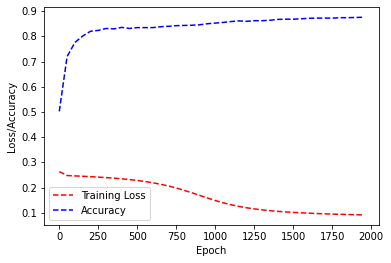

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE,2000,0.05,xTest,yTest)

Iteration: 00000 - cost: 0.26646 - accuracy: 0.49743
Iteration: 00050 - cost: 0.23900 - accuracy: 0.82192
Iteration: 00100 - cost: 0.22562 - accuracy: 0.84589
Iteration: 00150 - cost: 0.21307 - accuracy: 0.85188
Iteration: 00200 - cost: 0.20138 - accuracy: 0.85360
Iteration: 00250 - cost: 0.19039 - accuracy: 0.85702
Iteration: 00300 - cost: 0.18003 - accuracy: 0.85702
Iteration: 00350 - cost: 0.17036 - accuracy: 0.85616
Iteration: 00400 - cost: 0.16145 - accuracy: 0.85531
Iteration: 00450 - cost: 0.15338 - accuracy: 0.85531
Iteration: 00500 - cost: 0.14618 - accuracy: 0.85702
Iteration: 00550 - cost: 0.13983 - accuracy: 0.85788
Iteration: 00600 - cost: 0.13429 - accuracy: 0.85788
Iteration: 00650 - cost: 0.12946 - accuracy: 0.85788
Iteration: 00700 - cost: 0.12525 - accuracy: 0.86301
Iteration: 00750 - cost: 0.12157 - accuracy: 0.86301
Iteration: 00800 - cost: 0.11834 - accuracy: 0.85873
Iteration: 00850 - cost: 0.11550 - accuracy: 0.85788
Iteration: 00900 - cost: 0.11300 - accuracy: 0

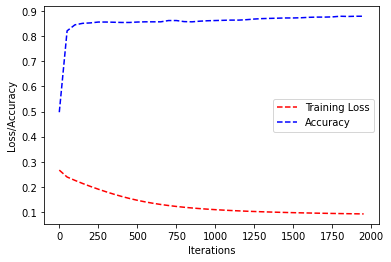

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE2,2000,0.05,xTest,yTest)

Iteration: 00000 - cost: 0.27008 - accuracy: 0.50257
Iteration: 00050 - cost: 0.24993 - accuracy: 0.50514
Iteration: 00100 - cost: 0.24926 - accuracy: 0.61901
Iteration: 00150 - cost: 0.24859 - accuracy: 0.73545
Iteration: 00200 - cost: 0.24792 - accuracy: 0.77226
Iteration: 00250 - cost: 0.24722 - accuracy: 0.79024
Iteration: 00300 - cost: 0.24649 - accuracy: 0.80993
Iteration: 00350 - cost: 0.24572 - accuracy: 0.82192
Iteration: 00400 - cost: 0.24489 - accuracy: 0.83476
Iteration: 00450 - cost: 0.24397 - accuracy: 0.84247
Iteration: 00500 - cost: 0.24292 - accuracy: 0.84503
Iteration: 00550 - cost: 0.24178 - accuracy: 0.84675
Iteration: 00600 - cost: 0.24055 - accuracy: 0.84846
Iteration: 00650 - cost: 0.23922 - accuracy: 0.85103
Iteration: 00700 - cost: 0.23777 - accuracy: 0.85445
Iteration: 00750 - cost: 0.23616 - accuracy: 0.85445
Iteration: 00800 - cost: 0.23437 - accuracy: 0.85873
Iteration: 00850 - cost: 0.23237 - accuracy: 0.85616
Iteration: 00900 - cost: 0.23015 - accuracy: 0

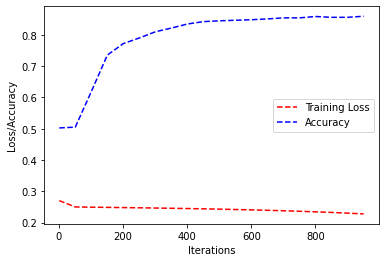

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE3,1000,0.05,xTest,yTest)

Iteration: 00000 - cost: 0.25460 - accuracy: 0.49743
Iteration: 00050 - cost: 0.25073 - accuracy: 0.47346
Iteration: 00100 - cost: 0.25050 - accuracy: 0.50171
Iteration: 00150 - cost: 0.25029 - accuracy: 0.50171
Iteration: 00200 - cost: 0.25010 - accuracy: 0.50171
Iteration: 00250 - cost: 0.24992 - accuracy: 0.50171
Iteration: 00300 - cost: 0.24974 - accuracy: 0.50257
Iteration: 00350 - cost: 0.24957 - accuracy: 0.50514
Iteration: 00400 - cost: 0.24941 - accuracy: 0.51284
Iteration: 00450 - cost: 0.24924 - accuracy: 0.52312
Iteration: 00500 - cost: 0.24907 - accuracy: 0.54880
Iteration: 00550 - cost: 0.24889 - accuracy: 0.58904
Iteration: 00600 - cost: 0.24871 - accuracy: 0.61729
Iteration: 00650 - cost: 0.24851 - accuracy: 0.64555
Iteration: 00700 - cost: 0.24830 - accuracy: 0.65839
Iteration: 00750 - cost: 0.24807 - accuracy: 0.67723
Iteration: 00800 - cost: 0.24781 - accuracy: 0.68151
Iteration: 00850 - cost: 0.24754 - accuracy: 0.71147
Iteration: 00900 - cost: 0.24723 - accuracy: 0

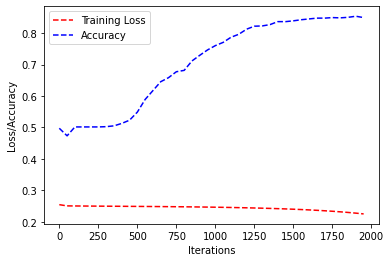

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE4,2000,0.05,xTest,yTest)

Iteration: 00000 - cost: 0.25762 - accuracy: 0.49743
Iteration: 00050 - cost: 0.24969 - accuracy: 0.63870
Iteration: 00100 - cost: 0.24950 - accuracy: 0.50856
Iteration: 00150 - cost: 0.24932 - accuracy: 0.51541
Iteration: 00200 - cost: 0.24913 - accuracy: 0.52140
Iteration: 00250 - cost: 0.24892 - accuracy: 0.52654
Iteration: 00300 - cost: 0.24871 - accuracy: 0.54281
Iteration: 00350 - cost: 0.24847 - accuracy: 0.58904
Iteration: 00400 - cost: 0.24822 - accuracy: 0.61729
Iteration: 00450 - cost: 0.24795 - accuracy: 0.65411
Iteration: 00500 - cost: 0.24766 - accuracy: 0.69264
Iteration: 00550 - cost: 0.24734 - accuracy: 0.71918
Iteration: 00600 - cost: 0.24700 - accuracy: 0.74829
Iteration: 00650 - cost: 0.24662 - accuracy: 0.78168
Iteration: 00700 - cost: 0.24621 - accuracy: 0.80394
Iteration: 00750 - cost: 0.24576 - accuracy: 0.81336
Iteration: 00800 - cost: 0.24526 - accuracy: 0.82791
Iteration: 00850 - cost: 0.24472 - accuracy: 0.83818
Iteration: 00900 - cost: 0.24413 - accuracy: 0

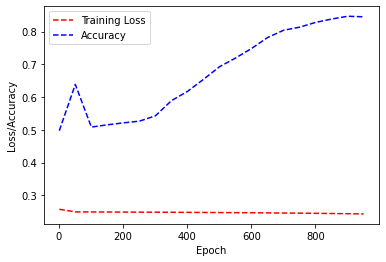

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE5,1000,0.05,xTest,yTest)

Iteration: 00000 - cost: 0.25435 - accuracy: 0.50257
Iteration: 00050 - cost: 0.25030 - accuracy: 0.50257
Iteration: 00100 - cost: 0.24974 - accuracy: 0.50257
Iteration: 00150 - cost: 0.24958 - accuracy: 0.50342
Iteration: 00200 - cost: 0.24946 - accuracy: 0.50856
Iteration: 00250 - cost: 0.24935 - accuracy: 0.51969
Iteration: 00300 - cost: 0.24923 - accuracy: 0.52825
Iteration: 00350 - cost: 0.24911 - accuracy: 0.54110
Iteration: 00400 - cost: 0.24898 - accuracy: 0.55822
Iteration: 00450 - cost: 0.24885 - accuracy: 0.58048
Iteration: 00500 - cost: 0.24872 - accuracy: 0.58990
Iteration: 00550 - cost: 0.24858 - accuracy: 0.60531
Iteration: 00600 - cost: 0.24843 - accuracy: 0.62243
Iteration: 00650 - cost: 0.24828 - accuracy: 0.64212
Iteration: 00700 - cost: 0.24812 - accuracy: 0.65068
Iteration: 00750 - cost: 0.24795 - accuracy: 0.66610
Iteration: 00800 - cost: 0.24778 - accuracy: 0.68836
Iteration: 00850 - cost: 0.24760 - accuracy: 0.70805
Iteration: 00900 - cost: 0.24740 - accuracy: 0

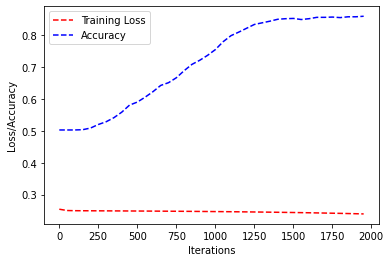

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE5,2000,0.05,xTest,yTest)

In [0]:
NN_ARCHITECTURE6= [ {"input_dim": 10, "output_dim": 50, "activation": "relu"}, 
                   {"input_dim": 50, "output_dim": 40, "activation": "sigmoid"},
                   {"input_dim": 40, "output_dim": 1, "activation": "sigmoid"}, ]
                   #epochs=1000,lr-0.08

Iteration: 00000 - cost: 0.25762 - accuracy: 0.49743
Iteration: 00050 - cost: 0.24969 - accuracy: 0.63870
Iteration: 00100 - cost: 0.24950 - accuracy: 0.50856
Iteration: 00150 - cost: 0.24932 - accuracy: 0.51541
Iteration: 00200 - cost: 0.24913 - accuracy: 0.52140
Iteration: 00250 - cost: 0.24892 - accuracy: 0.52654
Iteration: 00300 - cost: 0.24871 - accuracy: 0.54281
Iteration: 00350 - cost: 0.24847 - accuracy: 0.58904
Iteration: 00400 - cost: 0.24822 - accuracy: 0.61729
Iteration: 00450 - cost: 0.24795 - accuracy: 0.65411
Iteration: 00500 - cost: 0.24766 - accuracy: 0.69264
Iteration: 00550 - cost: 0.24734 - accuracy: 0.71918
Iteration: 00600 - cost: 0.24700 - accuracy: 0.74829
Iteration: 00650 - cost: 0.24662 - accuracy: 0.78168
Iteration: 00700 - cost: 0.24621 - accuracy: 0.80394
Iteration: 00750 - cost: 0.24576 - accuracy: 0.81336
Iteration: 00800 - cost: 0.24526 - accuracy: 0.82791
Iteration: 00850 - cost: 0.24472 - accuracy: 0.83818
Iteration: 00900 - cost: 0.24413 - accuracy: 0

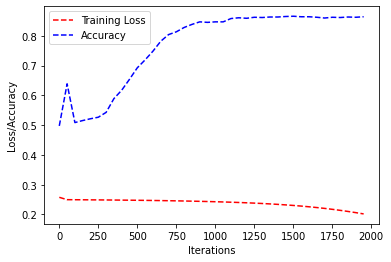

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE6,2000,0.05,xTest,yTest)

Iteration: 00000 - cost: 0.25762 - accuracy: 0.49743
Iteration: 00050 - cost: 0.24958 - accuracy: 0.50771
Iteration: 00100 - cost: 0.24928 - accuracy: 0.51712
Iteration: 00150 - cost: 0.24896 - accuracy: 0.52483
Iteration: 00200 - cost: 0.24861 - accuracy: 0.56336
Iteration: 00250 - cost: 0.24822 - accuracy: 0.61644
Iteration: 00300 - cost: 0.24778 - accuracy: 0.67637
Iteration: 00350 - cost: 0.24728 - accuracy: 0.72774
Iteration: 00400 - cost: 0.24670 - accuracy: 0.77654
Iteration: 00450 - cost: 0.24604 - accuracy: 0.80908
Iteration: 00500 - cost: 0.24526 - accuracy: 0.82791
Iteration: 00550 - cost: 0.24437 - accuracy: 0.84161
Iteration: 00600 - cost: 0.24336 - accuracy: 0.84589
Iteration: 00650 - cost: 0.24219 - accuracy: 0.84418
Iteration: 00700 - cost: 0.24084 - accuracy: 0.85788
Iteration: 00750 - cost: 0.23925 - accuracy: 0.85873
Iteration: 00800 - cost: 0.23738 - accuracy: 0.86130
Iteration: 00850 - cost: 0.23517 - accuracy: 0.86387
Iteration: 00900 - cost: 0.23257 - accuracy: 0

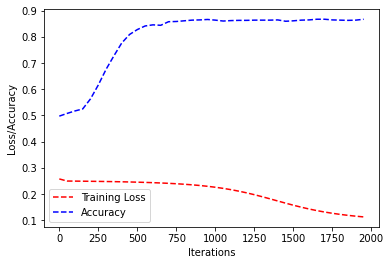

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE6,2000,0.08,xTest,yTest)

Iteration: 00000 - cost: 0.25762 - accuracy: 0.49743
Iteration: 00050 - cost: 0.24969 - accuracy: 0.63870
Iteration: 00100 - cost: 0.24950 - accuracy: 0.50856
Iteration: 00150 - cost: 0.24932 - accuracy: 0.51541
Iteration: 00200 - cost: 0.24913 - accuracy: 0.52140
Iteration: 00250 - cost: 0.24892 - accuracy: 0.52654
Iteration: 00300 - cost: 0.24871 - accuracy: 0.54281
Iteration: 00350 - cost: 0.24847 - accuracy: 0.58904
Iteration: 00400 - cost: 0.24822 - accuracy: 0.61729
Iteration: 00450 - cost: 0.24795 - accuracy: 0.65411
Iteration: 00500 - cost: 0.24766 - accuracy: 0.69264
Iteration: 00550 - cost: 0.24734 - accuracy: 0.71918
Iteration: 00600 - cost: 0.24700 - accuracy: 0.74829
Iteration: 00650 - cost: 0.24662 - accuracy: 0.78168
Iteration: 00700 - cost: 0.24621 - accuracy: 0.80394
Iteration: 00750 - cost: 0.24576 - accuracy: 0.81336
Iteration: 00800 - cost: 0.24526 - accuracy: 0.82791
Iteration: 00850 - cost: 0.24472 - accuracy: 0.83818
Iteration: 00900 - cost: 0.24413 - accuracy: 0

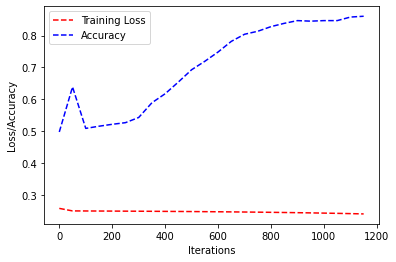

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE6,1200,0.05,xTest,yTest)

Iteration: 00000 - cost: 0.25762 - accuracy: 0.49743
Iteration: 00050 - cost: 0.24943 - accuracy: 0.51199
Iteration: 00100 - cost: 0.24896 - accuracy: 0.52483
Iteration: 00150 - cost: 0.24842 - accuracy: 0.59675
Iteration: 00200 - cost: 0.24778 - accuracy: 0.67637
Iteration: 00250 - cost: 0.24700 - accuracy: 0.74743
Iteration: 00300 - cost: 0.24604 - accuracy: 0.80908
Iteration: 00350 - cost: 0.24484 - accuracy: 0.83733
Iteration: 00400 - cost: 0.24337 - accuracy: 0.84589
Iteration: 00450 - cost: 0.24155 - accuracy: 0.85445
Iteration: 00500 - cost: 0.23926 - accuracy: 0.85959
Iteration: 00550 - cost: 0.23634 - accuracy: 0.86216
Iteration: 00600 - cost: 0.23259 - accuracy: 0.86473
Iteration: 00650 - cost: 0.22778 - accuracy: 0.86473
Iteration: 00700 - cost: 0.22164 - accuracy: 0.86045
Iteration: 00750 - cost: 0.21395 - accuracy: 0.86130
Iteration: 00800 - cost: 0.20460 - accuracy: 0.86301
Iteration: 00850 - cost: 0.19372 - accuracy: 0.86387
Iteration: 00900 - cost: 0.18173 - accuracy: 0

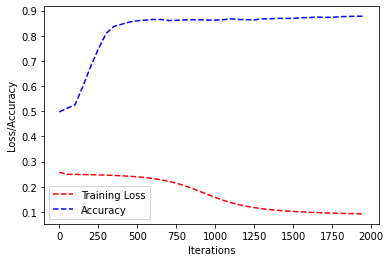

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE6,2000,0.12,xTest,yTest)

In [0]:
NN_ARCHITECTURE7= [ {"input_dim": 10, "output_dim": 2, "activation": "relu"}, 
                  
                   {"input_dim": 2, "output_dim": 1, "activation": "sigmoid"}, ]
                   #epochs=1000,lr-0.08

Iteration: 00000 - cost: 0.25062 - accuracy: 0.50257
Iteration: 00050 - cost: 0.25027 - accuracy: 0.50257
Iteration: 00100 - cost: 0.25013 - accuracy: 0.50257
Iteration: 00150 - cost: 0.25006 - accuracy: 0.50257
Iteration: 00200 - cost: 0.25003 - accuracy: 0.50257
Iteration: 00250 - cost: 0.25001 - accuracy: 0.50257
Iteration: 00300 - cost: 0.25000 - accuracy: 0.50257
Iteration: 00350 - cost: 0.25000 - accuracy: 0.50257
Iteration: 00400 - cost: 0.24999 - accuracy: 0.50257
Iteration: 00450 - cost: 0.24999 - accuracy: 0.50257
Iteration: 00500 - cost: 0.24999 - accuracy: 0.50257
Iteration: 00550 - cost: 0.24999 - accuracy: 0.50257
Iteration: 00600 - cost: 0.24998 - accuracy: 0.50257
Iteration: 00650 - cost: 0.24997 - accuracy: 0.50257
Iteration: 00700 - cost: 0.24994 - accuracy: 0.50257
Iteration: 00750 - cost: 0.24990 - accuracy: 0.50257
Iteration: 00800 - cost: 0.24981 - accuracy: 0.50257
Iteration: 00850 - cost: 0.24964 - accuracy: 0.52397
Iteration: 00900 - cost: 0.24932 - accuracy: 0

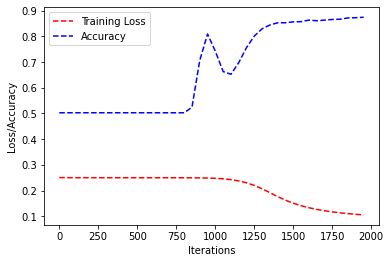

In [0]:
final_model(xTrain,yTrain,NN_ARCHITECTURE7,2000,0.12,xTest,yTest)